<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(0_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.4_n20.csv',
 'data_multi_delta_0.4_n30.csv',
 'data_multi_delta_0.4_n60.csv',
 'data_multi_delta_0.4_n120.csv',
 'data_multi_delta_0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,45.571792,21.185457,63.165873,76.968614,-0.749472,216.142264,216.689139,-0.546875
1,0.0,1.0,41.520581,36.144320,75.470318,63.473976,1.175996,227.785191,226.208969,1.576222
2,0.0,2.0,81.326769,96.710800,69.326857,80.358194,-0.469532,337.253088,338.216084,-0.962997
3,0.0,3.0,20.839741,41.738701,62.015351,91.078416,0.209647,225.881855,227.613018,-1.731163
4,0.0,4.0,48.874435,41.780347,96.952072,83.547641,2.579381,283.733876,280.889489,2.844388
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,92.254729,37.042936,71.238305,40.003826,-0.424737,250.115060,250.783826,-0.668766
19996,999.0,16.0,61.744553,38.131476,90.707965,51.056777,2.209077,253.849848,251.616684,2.233165
19997,999.0,17.0,92.301825,95.149107,47.803486,85.823729,1.419025,332.497172,330.300651,2.196522
19998,999.0,18.0,87.035116,79.654661,85.624608,62.694835,-2.383311,322.625909,324.437813,-1.811905


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,45.571792,21.185457,63.165873,76.968614,-0.749472,216.142264,216.689139,-0.546875
1,0.0,1.0,41.520581,36.144320,75.470318,63.473976,1.175996,227.785191,226.208969,1.576222
2,0.0,2.0,81.326769,96.710800,69.326857,80.358194,-0.469532,337.253088,338.216084,-0.962997
3,0.0,3.0,20.839741,41.738701,62.015351,91.078416,0.209647,225.881855,227.613018,-1.731163
4,0.0,4.0,48.874435,41.780347,96.952072,83.547641,2.579381,283.733876,280.889489,2.844388
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,92.254729,37.042936,71.238305,40.003826,-0.424737,250.115060,250.783826,-0.668766
19996,999.0,16.0,61.744553,38.131476,90.707965,51.056777,2.209077,253.849848,251.616684,2.233165
19997,999.0,17.0,92.301825,95.149107,47.803486,85.823729,1.419025,332.497172,330.300651,2.196522
19998,999.0,18.0,87.035116,79.654661,85.624608,62.694835,-2.383311,322.625909,324.437813,-1.811905


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    45.571792  21.185457  63.165873  76.968614 -0.749472  216.142264   
      1.0    41.520581  36.144320  75.470318  63.473976  1.175996  227.785191   
      2.0    81.326769  96.710800  69.326857  80.358194 -0.469532  337.253088   
      3.0    20.839741  41.738701  62.015351  91.078416  0.209647  225.881855   
      4.0    48.874435  41.780347  96.952072  83.547641  2.579381  283.733876   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   92.254729  37.042936  71.238305  40.003826 -0.424737  250.115060   
      16.0   61.744553  38.131476  90.707965  51.056777  2.209077  253.849848   
      17.0   92.301825  95.149107  47.803486  85.823729  1.419025  332.497172   
      18.0   87.035116  79.654661  85.624608  62.694835 -2.383311  322.625909   
      19.0   57.343623  62.804898  91.802460  46.530146 -2.488875  265.992251   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    216.689139 -0.546875  
      1.0    226.208969  1.576222  
      2.0    338.216084 -0.962997  
      3.0    227.613018 -1.731163  
      4.0    280.889489  2.844388  
...                 ...       ...  
999.0 15.0   250.783826 -0.668766  
      16.0   251.616684  2.233165  
      17.0   330.300651  2.196522  
      18.0   324.437813 -1.811905  
      19.0   268.502814 -2.510562  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    45.571792  21.185457  63.165873  76.968614 -0.749472  216.142264   
      1.0    41.520581  36.144320  75.470318  63.473976  1.175996  227.785191   
      2.0    81.326769  96.710800  69.326857  80.358194 -0.469532  337.253088   
      3.0    20.839741  41.738701  62.015351  91.078416  0.209647  225.881855   
      4.0    48.874435  41.780347  96.952072  83.547641  2.579381  283.733876   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   92.254729  37.042936  71.238305  40.003826 -0.424737  250.115060   
      16.0   61.744553  38.131476  90.707965  51.056777  2.209077  253.849848   
      17.0   92.301825  95.149107  47.803486  85.823729  1.419025  332.497172   
      18.0   87.035116  79.654661  85.624608  62.694835 -2.383311  322.625909   
      19.0   57.343623  62.804898  91.802460  46.530146 -2.488875  265.992251   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    216.689139 -0.546875  
      1.0    226.208969  1.576222  
      2.0    338.216084 -0.962997  
      3.0    227.613018 -1.731163  
      4.0    280.889489  2.844388  
...                 ...       ...  
999.0 15.0   250.783826 -0.668766  
      16.0   251.616684  2.233165  
      17.0   330.300651  2.196522  
      18.0   324.437813 -1.811905  
      19.0   268.502814 -2.510562  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,45.571792,21.185457,63.165873,76.968614,-0.749472,216.142264,216.689139,-0.546875
1,0.0,1.0,41.520581,36.144320,75.470318,63.473976,1.175996,227.785191,226.208969,1.576222
2,0.0,2.0,81.326769,96.710800,69.326857,80.358194,-0.469532,337.253088,338.216084,-0.962997
3,0.0,3.0,20.839741,41.738701,62.015351,91.078416,0.209647,225.881855,227.613018,-1.731163
4,0.0,4.0,48.874435,41.780347,96.952072,83.547641,2.579381,283.733876,280.889489,2.844388
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,92.254729,37.042936,71.238305,40.003826,-0.424737,250.115060,250.783826,-0.668766
19996,999.0,16.0,61.744553,38.131476,90.707965,51.056777,2.209077,253.849848,251.616684,2.233165
19997,999.0,17.0,92.301825,95.149107,47.803486,85.823729,1.419025,332.497172,330.300651,2.196522
19998,999.0,18.0,87.035116,79.654661,85.624608,62.694835,-2.383311,322.625909,324.437813,-1.811905


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    45.571792  21.185457  63.165873  76.968614 -0.749472  216.142264   
      1.0    41.520581  36.144320  75.470318  63.473976  1.175996  227.785191   
      2.0    81.326769  96.710800  69.326857  80.358194 -0.469532  337.253088   
      3.0    20.839741  41.738701  62.015351  91.078416  0.209647  225.881855   
      4.0    48.874435  41.780347  96.952072  83.547641  2.579381  283.733876   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   92.254729  37.042936  71.238305  40.003826 -0.424737  250.115060   
      16.0   61.744553  38.131476  90.707965  51.056777  2.209077  253.849848   
      17.0   92.301825  95.149107  47.803486  85.823729  1.419025  332.497172   
      18.0   87.035116  79.654661  85.624608  62.694835 -2.383311  322.625909   
      19.0   57.343623  62.804898  91.802460  46.530146 -2.488875  265.992251   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    216.689139 -0.546875  
      1.0    226.208969  1.576222  
      2.0    338.216084 -0.962997  
      3.0    227.613018 -1.731163  
      4.0    280.889489  2.844388  
...                 ...       ...  
999.0 15.0   250.783826 -0.668766  
      16.0   251.616684  2.233165  
      17.0   330.300651  2.196522  
      18.0   324.437813 -1.811905  
      19.0   268.502814 -2.510562  

[20000 rows x 8 columns]

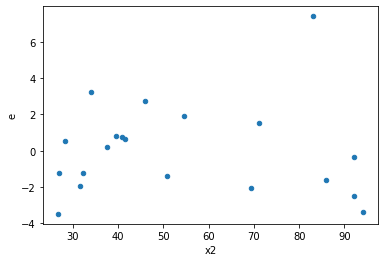

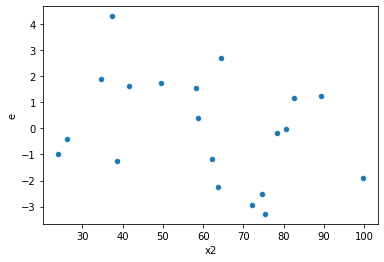

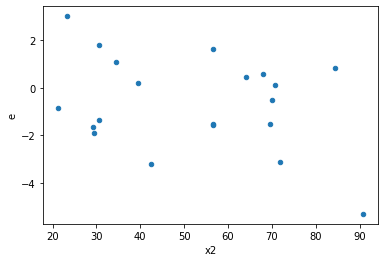

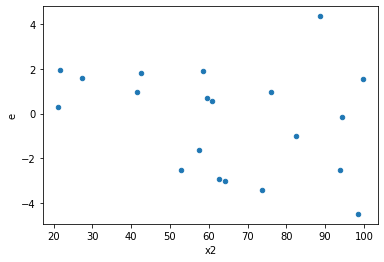

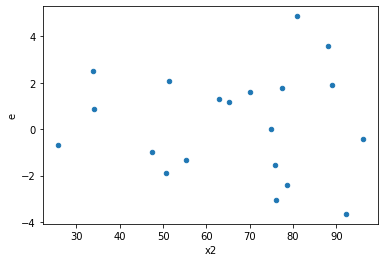

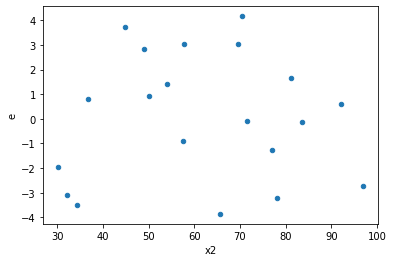

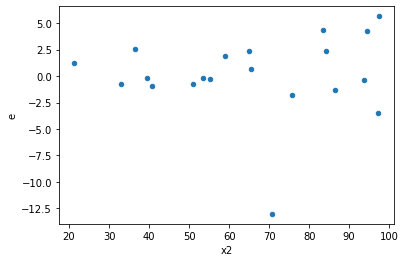

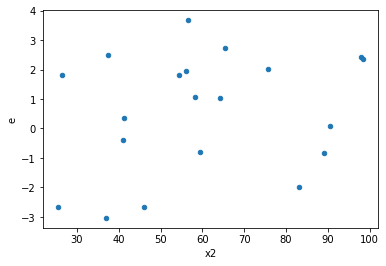

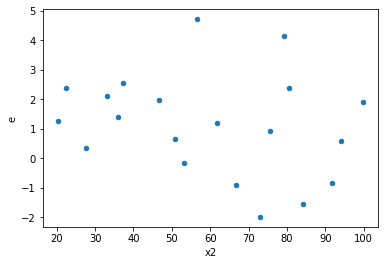

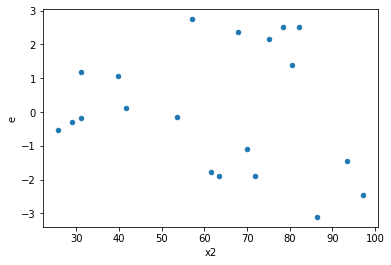

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,4.0,4.0,4.917951514316386,7.6743982401440745,1.2294878785790966,1.9185995600360186,1.5604867631987716,0.6768966521168025,0.6615516739415988,0.33844832605840125,Reject005=1 : Homoscedasticity
4.0,4.0,4.0,15.065350699201149,24.775672407737435,3.7663376748002872,6.193918101934359,1.6445466755082696,0.6416489405151466,0.6791755297424267,0.3208244702575733,Reject005=1 : Homoscedasticity
5.0,4.0,4.0,6.93287902736463,32.500225320881114,1.7332197568411576,8.125056330220279,4.687839668426366,0.16372477339797942,0.9181376133010103,0.08186238669898971,Reject005=1 : Homoscedasticity
6.0,4.0,4.0,1.202987695482553,4.613803100740372,0.3007469238706382,1.153450775185093,3.8352870258491243,0.22124670832880167,0.8893766458355992,0.11062335416440083,Reject005=1 : Homoscedasticity
10.0,4.0,4.0,14.949634869888806,66.4260250142715,3.7374087174722015,16.606506253567876,4.4433208966237165,0.17769828732234472,0.9111508563388276,0.08884914366117236,Reject005=1 : Homoscedasticity
12.0,4.0,4.0,8.989884061103895,13.338232355486584,2.247471015275974,3.334558088871646,1.4836934786730434,0.711571581673597,0.6442142091632015,0.3557857908367985,Reject005=1 : Homoscedasticity
13.0,4.0,4.0,3.1333354454075093,5.467357928170742,0.7833338613518773,1.3668394820426855,1.7449002902591169,0.6029286177493423,0.6985356911253289,0.3014643088746711,Reject005=1 : Homoscedasticity
14.0,4.0,4.0,13.296025238069351,40.57088248559259,3.3240063095173378,10.142720621398148,3.0513542024145317,0.30540011008107326,0.8472999449594634,0.15270005504053663,Reject005=1 : Homoscedasticity
16.0,4.0,4.0,4.446968219547275,177.64193807400812,1.1117420548868187,44.41048451850203,39.946752327385205,0.0035203289817296035,0.9982398355091352,0.0017601644908648018,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,24.819980996892237,0.341441178089274,6.204995249223059,0.0853602945223185,0.013756705862588153,0.0010948783506770524,Reject005=0 : Heteroscedasticity
1.0,4.0,4.0,14.747666930326035,5.426667005829744,3.686916732581509,1.356666751457436,0.3679678305366891,0.3562788003353896,Reject005=1 : Homoscedasticity
2.0,4.0,4.0,4.917951514316386,7.6743982401440745,1.2294878785790966,1.9185995600360186,1.5604867631987716,0.6768966521168025,Reject005=1 : Homoscedasticity
3.0,4.0,4.0,30.5029777138601,6.948414587560835,7.625744428465025,1.7371036468902088,0.22779463214188359,0.18098628748321144,Reject005=1 : Homoscedasticity
4.0,4.0,4.0,15.065350699201149,24.775672407737435,3.7663376748002872,6.193918101934359,1.6445466755082696,0.6416489405151466,Reject005=1 : Homoscedasticity
5.0,4.0,4.0,6.93287902736463,32.500225320881114,1.7332197568411576,8.125056330220279,4.687839668426366,0.16372477339797942,Reject005=1 : Homoscedasticity
6.0,4.0,4.0,1.202987695482553,4.613803100740372,0.3007469238706382,1.153450775185093,3.8352870258491243,0.22124670832880167,Reject005=1 : Homoscedasticity
7.0,4.0,4.0,13.614903721509165,4.57279846770211,3.4037259303772913,1.1431996169255274,0.33586711747934644,0.3157067975079737,Reject005=1 : Homoscedasticity
8.0,4.0,4.0,12.749978689697155,8.902416831509658,3.1874946724242887,2.2256042078774145,0.6982299381177329,0.7362602596709555,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      914
Reject005=0 : Heteroscedasticity     86
Name: Result_test, dtype: int64